# 🛠️ Feature Engineering for Election Model
This notebook focuses on creating and validating features for the election model pipeline. Each step builds upon cleaned and merged data from the previous notebook to prepare inputs for model training.


## 📚 Library Imports

In [1]:
# Importing pandas for efficient data handling and manipulation
import pandas as pd

## 📂 Load and Prepare Cleaned Data


In [3]:
# Load the cleaned and merged polling data for feature engineering
df = pd.read_csv("dataset/polling_data_cleaned_and_merged.csv", index_col=0)

# Drop redundant column
df = df.drop(columns=['candidate_name'])

# Uncomment below for handling 2024-specific data (if applicable)
# df = pd.read_csv("data/2024_polling_data_cleaned_and_merged.csv", index_col=0)
# df.rename(columns={'candidate_name': 'candidate'}, inplace=True)

# Display the loaded dataframe
df

,cycle,modeldate,pct_estimate,party,election_date,days_until_election,category,candidate,vote_share
state,,,,,,,,,
Wyoming,2020,2020-11-03,61.974290,REP,2020-11-03,0,Red States,Donald Trump,69.936227
Wisconsin,2020,2020-11-03,43.665550,REP,2020-11-03,0,Swing States,Donald Trump,48.822437
West Virginia,2020,2020-11-03,61.895820,REP,2020-11-03,0,Red States,Donald Trump,68.624730
Washington,2020,2020-11-03,36.260520,REP,2020-11-03,0,Blue States,Donald Trump,38.766978
Virginia,2020,2020-11-03,41.782650,REP,2020-11-03,0,Blue States,Donald Trump,43.995504
...,...,...,...,...,...,...,...,...,...
Vermont,2004,2004-11-02,49.357665,DEM,2004-11-02,0,Blue States,John Kerry,58.937463
Virginia,2004,2004-11-02,43.916727,DEM,2004-11-02,0,Blue States,John Kerry,45.483899
Washington,2004,2004-11-02,51.681792,DEM,2004-11-02,0,Blue States,John Kerry,52.821148


## 📆 Feature Engineering: Days Before Election

In [5]:
# Calculate the number of days until the election for each record
# Convert relevant columns to datetime for accurate calculations
df['election_date'] = pd.to_datetime(df['election_date'])
df['modeldate'] = pd.to_datetime(df['modeldate'])

# Map election dates to cycles
election_dates = {
    2004: pd.to_datetime('2004-11-02'),
    2008: pd.to_datetime('2008-11-04'),
    2012: pd.to_datetime('2012-11-06'),
    2016: pd.to_datetime('2016-11-08'),
    2020: pd.to_datetime('2020-11-03'),
    2024: pd.to_datetime('2024-11-05')
}
df['election_date'] = df['cycle'].map(election_dates)

# Compute the difference in days between the model date and the election date
df['days_until_election'] = (df['election_date'] - df['modeldate']).dt.days

# Display the updated DataFrame to verify the new feature
df

,cycle,modeldate,pct_estimate,party,election_date,days_until_election,category,candidate,vote_share
state,,,,,,,,,
Wyoming,2020,2020-11-03,61.974290,REP,2020-11-03,0,Red States,Donald Trump,69.936227
Wisconsin,2020,2020-11-03,43.665550,REP,2020-11-03,0,Swing States,Donald Trump,48.822437
West Virginia,2020,2020-11-03,61.895820,REP,2020-11-03,0,Red States,Donald Trump,68.624730
Washington,2020,2020-11-03,36.260520,REP,2020-11-03,0,Blue States,Donald Trump,38.766978
Virginia,2020,2020-11-03,41.782650,REP,2020-11-03,0,Blue States,Donald Trump,43.995504
...,...,...,...,...,...,...,...,...,...
Vermont,2004,2004-11-02,49.357665,DEM,2004-11-02,0,Blue States,John Kerry,58.937463
Virginia,2004,2004-11-02,43.916727,DEM,2004-11-02,0,Blue States,John Kerry,45.483899
Washington,2004,2004-11-02,51.681792,DEM,2004-11-02,0,Blue States,John Kerry,52.821148


### 👤 Feature Engineering: Incumbent Candidate


In [7]:
# Map incumbency for presidents and vice presidents
year_to_pres = {
    2004: 'George W. Bush',
    2008: 'George W. Bush',
    2012: 'Barack Obama',
    2016: 'Barack Obama',
    2020: 'Donald Trump',
    2024: 'Joseph R. Biden Jr.'
}
year_to_vp = {
    2004: 'Richard Cheney',
    2008: 'Richard Cheney',
    2012: 'Joseph R. Biden Jr.',
    2016: 'Joseph R. Biden Jr.',
    2020: 'Mike Pence',
    2024: 'Kamala Harris'
}

# Create new features to check if the candidate is the incumbent president or vice president
df['is_incumbent_pres'] = df.apply(
    lambda row: row['candidate'] == year_to_pres.get(row['cycle'], ''), axis=1
)

df['is_incumbent_vp'] = df.apply(
    lambda row: row['candidate'] == year_to_vp.get(row['cycle'], ''), axis=1
)

# Display the updated DataFrame to verify the new incumbency features
df

,cycle,modeldate,pct_estimate,party,election_date,days_until_election,category,candidate,vote_share,is_incumbent_pres,is_incumbent_vp
state,,,,,,,,,,,
Wyoming,2020,2020-11-03,61.974290,REP,2020-11-03,0,Red States,Donald Trump,69.936227,True,False
Wisconsin,2020,2020-11-03,43.665550,REP,2020-11-03,0,Swing States,Donald Trump,48.822437,True,False
West Virginia,2020,2020-11-03,61.895820,REP,2020-11-03,0,Red States,Donald Trump,68.624730,True,False
Washington,2020,2020-11-03,36.260520,REP,2020-11-03,0,Blue States,Donald Trump,38.766978,True,False
Virginia,2020,2020-11-03,41.782650,REP,2020-11-03,0,Blue States,Donald Trump,43.995504,True,False
...,...,...,...,...,...,...,...,...,...,...,...
Vermont,2004,2004-11-02,49.357665,DEM,2004-11-02,0,Blue States,John Kerry,58.937463,False,False
Virginia,2004,2004-11-02,43.916727,DEM,2004-11-02,0,Blue States,John Kerry,45.483899,False,False
Washington,2004,2004-11-02,51.681792,DEM,2004-11-02,0,Blue States,John Kerry,52.821148,False,False


In [8]:
# Map the incumbent party to each election cycle
year_to_party = {
    2004: 'REP',
    2008: 'REP',
    2012: 'DEM',
    2016: 'DEM',
    2020: 'REP',
    2024: 'DEM'
}

# Create a feature to indicate if the candidate's party is the incumbent party
df['is_incumbent_party'] = df.apply(
    lambda row: row['party'] == year_to_party.get(row['cycle'], ''), axis=1
)

# Display the updated DataFrame to verify the new incumbent party feature
df

,cycle,modeldate,pct_estimate,party,election_date,days_until_election,category,candidate,vote_share,is_incumbent_pres,is_incumbent_vp,is_incumbent_party
state,,,,,,,,,,,,
Wyoming,2020,2020-11-03,61.974290,REP,2020-11-03,0,Red States,Donald Trump,69.936227,True,False,True
Wisconsin,2020,2020-11-03,43.665550,REP,2020-11-03,0,Swing States,Donald Trump,48.822437,True,False,True
West Virginia,2020,2020-11-03,61.895820,REP,2020-11-03,0,Red States,Donald Trump,68.624730,True,False,True
Washington,2020,2020-11-03,36.260520,REP,2020-11-03,0,Blue States,Donald Trump,38.766978,True,False,True
Virginia,2020,2020-11-03,41.782650,REP,2020-11-03,0,Blue States,Donald Trump,43.995504,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
Vermont,2004,2004-11-02,49.357665,DEM,2004-11-02,0,Blue States,John Kerry,58.937463,False,False,False
Virginia,2004,2004-11-02,43.916727,DEM,2004-11-02,0,Blue States,John Kerry,45.483899,False,False,False
Washington,2004,2004-11-02,51.681792,DEM,2004-11-02,0,Blue States,John Kerry,52.821148,False,False,False


### 🔢 Encoding Categorical Features



In [9]:
# Create dummy variables for the 'party' column to encode it as numerical features
df['party_copy'] = df['party']  # Create a copy of the party column
df = pd.get_dummies(df, columns=['party_copy'], prefix='party')  # One-hot encode the 'party_copy' column

# Display the updated DataFrame for review before checking correlations
df

,cycle,modeldate,pct_estimate,party,election_date,days_until_election,category,candidate,vote_share,is_incumbent_pres,is_incumbent_vp,is_incumbent_party,party_DEM,party_REP
state,,,,,,,,,,,,,,
Wyoming,2020,2020-11-03,61.974290,REP,2020-11-03,0,Red States,Donald Trump,69.936227,True,False,True,False,True
Wisconsin,2020,2020-11-03,43.665550,REP,2020-11-03,0,Swing States,Donald Trump,48.822437,True,False,True,False,True
West Virginia,2020,2020-11-03,61.895820,REP,2020-11-03,0,Red States,Donald Trump,68.624730,True,False,True,False,True
Washington,2020,2020-11-03,36.260520,REP,2020-11-03,0,Blue States,Donald Trump,38.766978,True,False,True,False,True
Virginia,2020,2020-11-03,41.782650,REP,2020-11-03,0,Blue States,Donald Trump,43.995504,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vermont,2004,2004-11-02,49.357665,DEM,2004-11-02,0,Blue States,John Kerry,58.937463,False,False,False,True,False
Virginia,2004,2004-11-02,43.916727,DEM,2004-11-02,0,Blue States,John Kerry,45.483899,False,False,False,True,False
Washington,2004,2004-11-02,51.681792,DEM,2004-11-02,0,Blue States,John Kerry,52.821148,False,False,False,True,False


### 🚨 Checking for Missing Values


Highly correlated pairs:  []


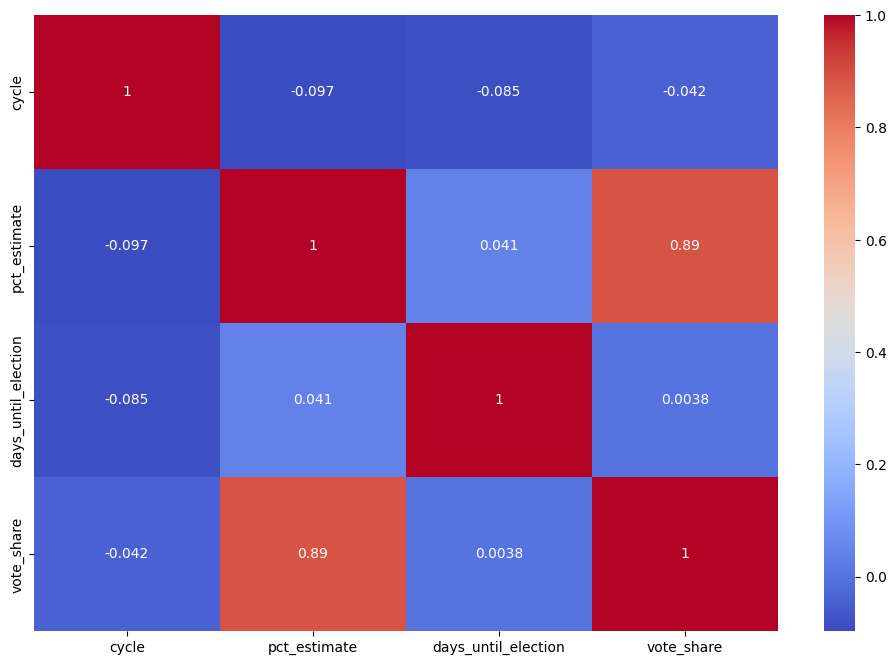

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select numeric columns for calculating correlations
numeric_df = df.select_dtypes(include=[np.number])

# Plot the correlation matrix to visualize relationships between features
plt.figure(figsize=(12, 8))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Identify pairs of features with high correlation (absolute value >= 0.9)
high_corr_pairs = list(
    corr[abs(corr) >= 0.9].where(np.triu(np.ones(corr.shape), k=1).astype(bool)).stack().index
)

# Display highly correlated pairs for further analysis
print("Highly correlated pairs: ", high_corr_pairs)

In [11]:
# Calculate the number of missing values for each column
df_missing = df.isnull().sum()

# Display the missing values to identify columns requiring attention
df_missing

,0
cycle,0
modeldate,0
pct_estimate,0
party,0
election_date,0
days_until_election,0
category,0
candidate,0
vote_share,0
is_incumbent_pres,0


In [12]:
# Display the data types of each column to ensure consistency and correctness
df.dtypes

,0
cycle,int64
modeldate,datetime64[ns]
pct_estimate,float64
party,object
election_date,datetime64[ns]
days_until_election,int64
category,object
candidate,object
vote_share,float64
is_incumbent_pres,bool


### 💾 Save Processed Data for Model Training


In [13]:
# Save the processed DataFrame with new features for model training
df.to_csv("output/polling_data_with_features.csv")

# Uncomment the line below to save a version specifically for 2024 handling
df.to_csv("output/2024_polling_data_with_features.csv")